Practice 7 Consider the predator-prey model: 
dx/dt=r_1 x(1-x/k_1 )-b_1 xy+β_1 xz,
dy/dt=r_2 y(1-y/k_2 )-b_2 xy+β_2 yz,
dz/dt=r_3 z(1-z/k_3 )-γ_1 xz-γ_2 yz,
(7.1) 
where x and y are competing predators, and z is the prey.
 Initial conditions are given by x(t) |_(t=0)=x_0, y(t) |_(t=0)=y_0, z(t) |_(t=0)=z_0, (7.2) 
where x_0<y_0<z_0.
Tasks 
1. Solve model (7.1) with initial conditions (7.2) using the Runge-Kutta method. 
2. Select the model parameters to obtain the following cases: 
a) x→0, y→0 and z→0;
b) equilibrium state of the system, i.e. all the species coexist; 
c) x→0, y and z remain stable (coexist). 
3. Draw the graphs for all the given cases.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the system
r1, r2, r3 = 0.5, 0.3, 0.4   # Growth rates
k1, k2, k3 = 100, 100, 100   # Carrying capacities
b1, b2 = 0.01, 0.01          # Competition coefficients
beta1, beta2 = 0.02, 0.02    # Predation coefficients
gamma1, gamma2 = 0.01, 0.01  # Predator coefficients

# Define the system of differential equations (predator-prey model)
#def predator_prey_model(t, X):
def predator_prey_model(t, X):
    x, y, z = X
    
    t0, tf, dt = 0, 100, 0.1
    t = np.arange(t0, tf, dt)
    dxdt = r1 * x * (1 - x / k1) - b1 * x * y + beta1 * x * z
    dydt = r2 * y * (1 - y / k2) - b2 * x * y + beta2 * y * z
    dzdt = r3 * z * (1 - z / k3) - gamma1 * x * z - gamma2 * y * z
    return np.array([dxdt, dydt, dzdt])

# Runge-Kutta 4th Order Method
#def runge_kutta_4(f, X0, t0, tf, dt):
x0, y0, z0 = 10, 20, 30
X0 = np.array([x0, y0, z0])
t0, tf, dt = 0, 100, 0.1
t = np.arange(t0, tf, dt)
#def runge_kutta_4(predator_prey_model, X0):
def runge_kutta_4(f):
    #t0, tf, dt = 0, 100, 0.1
    #t = np.arange(t0, tf, dt)
    X = np.zeros((len(t), len(X0)))
    #X = np.zeros((len(t)))
    X[0] = X0
    for i in range(1, len(t)):
        #k1 = dt * predator_prey_model(t[i-1], X[i-1])
        k1 = dt * f(t[i-1], X[i-1])
        #k2 = dt * predator_prey_model(t[i-1] + dt/2, X[i-1] + k1/2)
        k2 = dt * f(t[i-1] + dt/2, X[i-1] + k1/2)
        #k3 = dt * predator_prey_model(t[i-1] + dt/2, X[i-1] + k2/2)
        k3 = dt * f(t[i-1] + dt/2, X[i-1] + k2/2)
        #k4 = dt * predator_prey_model(t[i-1] + dt, X[i-1] + k3)
        k4 = dt * f(t[i-1] + dt, X[i-1] + k3)
        X[i] = X[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, X

# Initial conditions (x0, y0, z0)
#x0, y0, z0 = 10, 20, 30
#X0 = np.array([x0, y0, z0])

# Time settings
#t0, tf, dt = 0, 100, 0.1
#t = np.arange(t0, tf, dt)

# Solve the system
#t, X = runge_kutta_4(predator_prey_model, X0, t0, tf, dt)
t, X = runge_kutta_4(predator_prey_model)
x, y, z = X[:, 0], X[:, 1], X[:, 2]

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(t, x, label='x (Predator 1)')
plt.plot(t, y, label='y (Predator 2)')
plt.plot(t, z, label='z (Prey)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Predator-Prey Model with Runge-Kutta 4th Order Method')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the system
r1, r2, r3 = 0.5, 0.3, 0.4   # Growth rates
k1, k2, k3 = 100, 100, 100   # Carrying capacities
b1, b2 = 0.01, 0.01          # Competition coefficients
beta1, beta2 = 0.02, 0.02    # Predation coefficients
gamma1, gamma2 = 0.01, 0.01  # Predator coefficients

# Define the system of differential equations (predator-prey model)
def predator_prey_model(t, X):
    x, y, z = X
    dxdt = r1 * x * (1 - x / k1) - b1 * x * y + beta1 * x * z
    dydt = r2 * y * (1 - y / k2) - b2 * x * y + beta2 * y * z
    dzdt = r3 * z * (1 - z / k3) - gamma1 * x * z - gamma2 * y * z
    return np.array([dxdt, dydt, dzdt])

# Runge-Kutta 4th Order Method
def runge_kutta_4(f, X0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    X = np.zeros((len(t), len(X0)))
    X[0] = X0
    for i in range(1, len(t)):
        k1 = dt * f(t[i-1], X[i-1])
        k2 = dt * f(t[i-1] + dt/2, X[i-1] + k1/2)
        k3 = dt * f(t[i-1] + dt/2, X[i-1] + k2/2)
        k4 = dt * f(t[i-1] + dt, X[i-1] + k3)
        X[i] = X[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, X

# Initial conditions (x0, y0, z0)
x0, y0, z0 = 10, 20, 30
X0 = np.array([x0, y0, z0])

# Time settings
t0, tf, dt = 0, 100, 0.1

# Solve the system
t, X = runge_kutta_4(predator_prey_model, X0, t0, tf, dt)
x, y, z = X[:, 0], X[:, 1], X[:, 2]

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(t, x, label='x (Predator 1)')
plt.plot(t, y, label='y (Predator 2)')
plt.plot(t, z, label='z (Prey)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Predator-Prey Model with Runge-Kutta 4th Order Method')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r1, r2, r3 = 0.5, 0.3, 0.4   
k1, k2, k3 = 100, 100, 100   
b1, b2 = 0.01, 0.01          
beta1, beta2 = 0.02, 0.02    
gamma1, gamma2 = 0.01, 0.01 

t0, t_end, dt = 0, 100, 0.1
t = np.arange(t0, t_end, dt)
def formula(t, x_step):
    x, y, z = x_step
    dx_dt = r1 * x * (1 - x / k1) - b1 * x * y + beta1 * x * z
    dy_dt = r2 * y * (1 - y / k2) - b2 * x * y + beta2 * y * z
    dz_dt = r3 * z * (1 - z / k3) - gamma1 * x * z - gamma2 * y * z
    return np.array([dx_dt, dy_dt, dz_dt])

x_step_0 = np.array([x0, y0, z0])

def runge_kutta(f):
    x_step = np.zeros((len(t), len(x_step_0)))
    x_step[0]=x_step_0

    for i in range(0, len(t) - 1):
        k1 = f(t[i], x_step[i])
        k2 = f(t[i] + 0.5*dt, x_step[i] + 0.5*k1)
        k3 = f(t[i] + 0.5*dt, x_step[i] + 0.5*k2)
        k4 = f(t[i] + dt, x_step[i] + dt*k3)

        x_step[i+1] = x_step[i] + dt*(k1+2*k2+2*k3+k4)/6
    return t, x_step

t, x_step = runge_kutta(formula)
x, y, z = x_step[:, 0], x_step[:, 1], x_step[:, 2]

plt.figure(figsize=(12, 8))
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.plot(t, z, label='z')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator prey model graph')
plt.grid()
plt.show() 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
def model(x, y, z, params):
    r1, k1, b1, beta1, r2, k2, b2, beta2, r3, k3, gamma1, gamma2 = params
    dxdt = r1 * x * (1 - x / k1) - b1 * x * y + beta1 * x * z
    dydt = r2 * y * (1 - y / k2) - b2 * x * y + beta2 * y * z
    dzdt = r3 * z * (1 - z / k3) - gamma1 * x * z - gamma2 * y * z
    return dxdt, dydt, dzdt

# Implement the Runge-Kutta method
def runge_kutta(initial_conditions, params, t_span, dt):
    steps = int(t_span / dt)
    x = np.zeros(steps)
    y = np.zeros(steps)
    z = np.zeros(steps)
    
    x[0], y[0], z[0] = initial_conditions
    
    for i in range(steps - 1):
        t = i * dt
        k1 = np.array(model(x[i], y[i], z[i], params))
        k2 = np.array(model(x[i] + dt / 2 * k1[0], y[i] + dt / 2 * k1[1], z[i] + dt / 2 * k1[2], params))
        k3 = np.array(model(x[i] + dt / 2 * k2[0], y[i] + dt / 2 * k2[1], z[i] + dt / 2 * k2[2], params))
        k4 = np.array(model(x[i] + dt * k3[0], y[i] + dt * k3[1], z[i] + dt * k3[2], params))

        x[i + 1] = x[i] + dt / 6 * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0])
        y[i + 1] = y[i] + dt / 6 * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1])
        z[i + 1] = z[i] + dt / 6 * (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2])
    
    return x, y, z

# Parameters and initial conditions for case (a)
params_a = (0.1, 10, 0.01, 0.01, 0.1, 10, 0.01, 0.01, 0.1, 10, 0.01, 0.01)
initial_a = (0.1, 0.1, 0.1)  # x, y, z are small
t_span = 200
dt = 0.1

# Run simulation for case (a)
x_a, y_a, z_a = runge_kutta(initial_a, params_a, t_span, dt)

# Parameters and initial conditions for case (b)
params_b = (0.1, 10, 0.01, 0.01, 0.1, 10, 0.01, 0.01, 0.1, 10, 0.01, 0.01)
initial_b = (3, 3, 8)  # Arbitrarily chosen for coexistence

# Run simulation for case (b)
x_b, y_b, z_b = runge_kutta(initial_b, params_b, t_span, dt)

# Parameters and initial conditions for case (c)
params_c = (0.1, 10, 0.01, 0.01, 0.1, 10, 0.01, 0.01, 0.1, 10, 0.01, 0.01)
initial_c = (0.1, 3, 8)  # x is small, y and z larger

# Run simulation for case (c)
x_c, y_c, z_c = runge_kutta(initial_c, params_c, t_span, dt)

# Plot results
plt.figure(figsize=(12, 8))

# Case a
plt.subplot(3, 1, 1)
plt.plot(np.arange(0, t_span, dt), x_a, label='Prey x', color='r')
plt.plot(np.arange(0, t_span, dt), y_a, label='Predator y', color='g')
plt.plot(np.arange(0, t_span, dt), z_a, label='Prey z', color='b')
plt.title('Case a: x→0, y→0, z→0')
plt.legend()

# Case b
plt.subplot(3, 1, 2)
plt.plot(np.arange(0, t_span, dt), x_b, label='Prey x', color='r')
plt.plot(np.arange(0, t_span, dt), y_b, label='Predator y', color='g')
plt.plot(np.arange(0, t_span, dt), z_b, label='Prey z', color='b')
plt.title('Case b: Coexistence')
plt.legend()

# Case c
plt.subplot(3, 1, 3)

plt.plot(np.arange(0, t_span, dt), x_c, label='Prey x', color='r')
plt.plot(np.arange(0, t_span, dt), y_c, label='Predator y', color='g')
plt.plot(np.arange(0, t_span, dt), z_c, label='Prey z', color='b')
plt.title('Case c: x→0, y and z stable')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model
def model(x, y, z, params):
    r1, k1, b1, beta1, r2, k2, b2, beta2, r3, k3, gamma1, gamma2 = params
    dxdt = r1 * x * (1 - x / k1) - b1 * x * y + beta1 * x * z
    dydt = r2 * y * (1 - y / k2) - b2 * x * y + beta2 * y * z
    dzdt = r3 * z * (1 - z / k3) - gamma1 * x * z - gamma2 * y * z
    return dxdt, dydt, dzdt

# Implement the Runge-Kutta method
def runge_kutta(initial_conditions, params, t_span, dt):
    steps = int(t_span / dt)
    x = np.zeros(steps)
    y = np.zeros(steps)
    z = np.zeros(steps)
    
    x[0], y[0], z[0] = initial_conditions
    
    for i in range(steps - 1):
        t = i * dt
        k1 = np.array(model(x[i], y[i], z[i], params))
        k2 = np.array(model(x[i] + dt / 2 * k1[0], y[i] + dt / 2 * k1[1], z[i] + dt / 2 * k1[2], params))
        k3 = np.array(model(x[i] + dt / 2 * k2[0], y[i] + dt / 2 * k2[1], z[i] + dt / 2 * k2[2], params))
        k4 = np.array(model(x[i] + dt * k3[0], y[i] + dt * k3[1], z[i] + dt * k3[2], params))

        x[i + 1] = x[i] + dt / 6 * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0])
        y[i + 1] = y[i] + dt / 6 * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1])
        z[i + 1] = z[i] + dt / 6 * (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2])
    
    return x, y, z

# Parameters and initial conditions for case (a)
params_a = (0.01, 10, 1.5, 0.01, 0.01, 10, 1.5, 0.01, 0.01, 10, 0.01, 0.01)
initial_a = (0.5, 0.5, 0.5)  # x, y, z small, but initial populations can be increased to visualize decrease
t_span = 200
dt = 0.1

# Run simulation for case (a)
x_a, y_a, z_a = runge_kutta(initial_a, params_a, t_span, dt)

# Plot results
plt.figure(figsize=(8, 6))

# Case a
plt.plot(np.arange(0, t_span, dt), x_a, label='Prey x', color='r')
plt.plot(np.arange(0, t_span, dt), y_a, label='Predator y', color='g')
plt.plot(np.arange(0, t_span, dt), z_a, label='Prey z', color='b')
plt.title('Case a: x→0, y→0, z→0')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid()
plt.show()


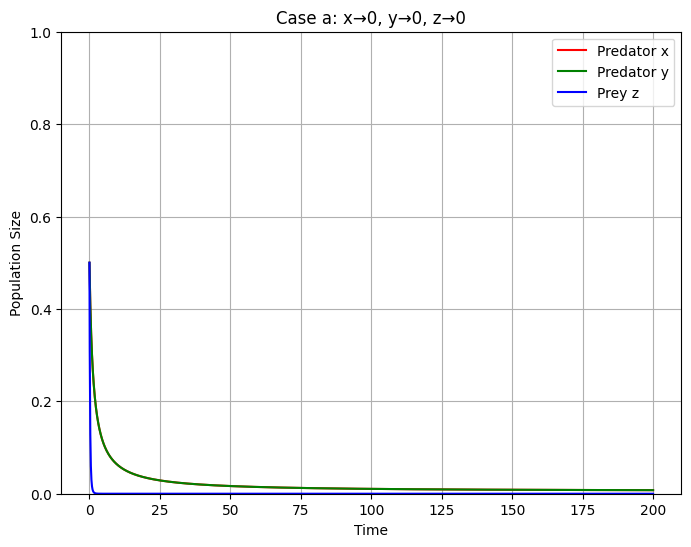

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model
def model(x, y, z, params):
    r1, k1, b1, beta1, r2, k2, b2, beta2, r3, k3, gamma1, gamma2 = params
    dxdt = r1 * x * (1 - x / k1) - b1 * x * y + beta1 * x * z
    dydt = r2 * y * (1 - y / k2) - b2 * x * y + beta2 * y * z
    dzdt = r3 * z * (1 - z / k3) - gamma1 * x * z - gamma2 * y * z
    return dxdt, dydt, dzdt

# Implement the Runge-Kutta method
def runge_kutta(initial_conditions, params, t_span, dt):
    steps = int(t_span / dt)
    x = np.zeros(steps)
    y = np.zeros(steps)
    z = np.zeros(steps)
    
    x[0], y[0], z[0] = initial_conditions
    
    for i in range(steps - 1):
        t = i * dt
        k1 = np.array(model(x[i], y[i], z[i], params))
        k2 = np.array(model(x[i] + dt / 2 * k1[0], y[i] + dt / 2 * k1[1], z[i] + dt / 2 * k1[2], params))
        k3 = np.array(model(x[i] + dt / 2 * k2[0], y[i] + dt / 2 * k2[1], z[i] + dt / 2 * k2[2], params))
        k4 = np.array(model(x[i] + dt * k3[0], y[i] + dt * k3[1], z[i] + dt * k3[2], params))

        x[i + 1] = x[i] + dt / 6 * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0])
        y[i + 1] = y[i] + dt / 6 * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1])
        z[i + 1] = z[i] + dt / 6 * (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2])
    
    return x, y, z

# Parameters and initial conditions for case (a)
# Increased predation pressure and low growth rate for z
params_a = (0.01, 10, 1.5, 0.01, 0.01, 10, 1.5, 0.01, 0.01, 10, 5, 5)  # gamma1 and gamma2 increased
initial_a = (0.5, 0.5, 0.5)  # x, y, z small to ensure decline

t_span = 200
dt = 0.1

# Run simulation for case (a)
x_a, y_a, z_a = runge_kutta(initial_a, params_a, t_span, dt)
print()
# Plot results
plt.figure(figsize=(8, 6))

# Case a
plt.plot(np.arange(0, t_span, dt), x_a, label='Predator x', color='r')
plt.plot(np.arange(0, t_span, dt), y_a, label='Predator y', color='g')
plt.plot(np.arange(0, t_span, dt), z_a, label='Prey z', color='b')
plt.title('Case a: x→0, y→0, z→0')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.ylim(0, 1)  # Set y-limits for better visualization
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Task 2
import numpy as np
import matplotlib.pyplot as plt

# Define the Runge-Kutta 4th order method function
def runge_kutta_4(system, initial_conditions, t):
    n = len(t)
    num_vars = len(initial_conditions)
    results = np.zeros((n, num_vars))
    results[0] = initial_conditions

    for i in range(1, n):
        dt = t[i] - t[i - 1]
        k1 = system(results[i - 1])
        k2 = system(results[i - 1] + 0.5 * dt * k1)
        k3 = system(results[i - 1] + 0.5 * dt * k2)
        k4 = system(results[i - 1] + dt * k3)
        results[i] = results[i - 1] + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return results

# Time settings
t0, t_end, dt = 0, 100, 0.1
t = np.arange(t0, t_end + dt, dt)

# Initial conditions
initial_conditions = np.array([10, 20, 30])

# Define and solve each case
cases = {
    "Extinction": {
        "params": (0.05, 0.04, 0.03, 50, 50, 50, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1)
        #"params": (0.01, 10, 1.5, 0.01, 0.01, 10, 1.5, 0.01, 0.01, 10, 5, 5)
        #"params": (0.01, 10, 1.5, 0.01, 0.01, 10, 1.5, 0.01, 0.01, 10, 0.01, 0.01)
    },
    "Stable Equilibrium": {
        "params": (0.3, 0.3, 0.4, 50, 50, 50, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01)
    },
    "Cyclic Coexistence": {
        "params": (0.5, 0.4, 0.7, 50, 50, 50, 0.01, 0.01, 0.05, 0.05, 0.05, 0.05)
    },
}

# Run and plot each case
for case_name, case_info in cases.items():
    r1, r2, r3, k1, k2, k3, b1, b2, beta1, beta2, gamma1, gamma2 = case_info["params"]

    def predator_prey_system(variables):
        x, y, z = variables
        dx = r1 * x * (1 - x / k1) - b1 * x * y + beta1 * x * z
        dy = r2 * y * (1 - y / k2) - b2 * x * y + beta2 * y * z
        dz = r3 * z * (1 - z / k3) - gamma1 * x * z - gamma2 * y * z
        return np.array([dx, dy, dz])

    # Solve the system using Runge-Kutta 4
    solution = runge_kutta_4(predator_prey_system, initial_conditions, t)

    # Extract solutions for x, y, z
    x = solution[:, 0]
    y = solution[:, 1]
    z = solution[:, 2]

    # Plot results for this case
    plt.figure(figsize=(12, 6))
    plt.plot(t, x, label='Predator x (Species 1)')
    plt.plot(t, y, label='Predator y (Species 2)')
    plt.plot(t, z, label='Prey z')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title(f'Predator-Prey Model ({case_name})')
    plt.grid()
    plt.show()
